In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'


In [3]:
# 다양한 형식의 연, 월, 일 표시 데이터
# 시계열 색인 : index_col = 숫자
#시계열 색인 : DatetimeIndex()
d_list = ["05/07/2024 11:12:13", "05-07-2024 11:22:23","2024-5-07 11:33:23", "2024/05/07"]
pd.DatetimeIndex(d_list)
# pd.DatetimeIndex(d_list).year # 연도 값을 출력
# pd.DatetimeIndex(d_list).month # 월 값을 출력
# pd.DatetimeIndex(d_list).day #일 값을출력

DatetimeIndex(['2024-05-07 11:12:13', '2024-05-07 11:22:23',
               '2024-05-07 11:33:23', '2024-05-07 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [5]:
dt_index = pd.DatetimeIndex(d_list)
df = pd.DataFrame(np.arange(4)*10, index=dt_index, columns=["data"])
df
print()
print(df.index.year)
df.index.month
df.index.day


Index([2024, 2024, 2024, 2024], dtype='int32')


Index([7, 7, 7, 7], dtype='int32')

### [실습]
* 기상 데이터 분석
* 2010년부터 10년간 울릉도 지역의 기온과 풍속을 측정한 데이터

In [4]:
# 데이터 셋 가져오기
# !wget
# 윈도우 : curl
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -O  weather.csv
weather = pd.read_csv("weather.csv", index_col = 0)
weather.head()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 88955    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 88955  100 88955    0     0   111k      0 --:--:-- --:--:-- --:--:--  112k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: weather.csv


,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [6]:
# 1. 데이터프레임 탐색
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3653 entries, 2010-08-01 to 2020-07-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   평균 기온   3653 non-null   float64
 1   최대 풍속   3649 non-null   float64
 2   평균 풍속   3647 non-null   float64
dtypes: float64(3)
memory usage: 114.2+ KB


In [9]:
weather.describe()

,평균 기온,최대 풍속,평균 풍속
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


In [10]:
weather.mean()

평균 기온    12.942102
최대 풍속     7.911099
평균 풍속     3.936441
dtype: float64

In [11]:
# 1. 전체 데이터에 대하여 최대 풍속의 최대값을 출력하시오.
weather['최대 풍속'].max()

26.0

In [13]:
# 2. 데이터 정제와 결측 값 처리
# 1. 전체 테이블의 크기
print(weather.size)
# 2. 개별적인 열의 개수 확인 
print(weather.count())
# 3. 결측치 탐지 및 처리
missing_data = weather[weather['평균 풍속'].isna()]
print(missing_data )
#1)
# weather.dropna(axis=0, how='any', inplace=True) ->이방법 대신 아래방법으로

#2) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
weather.fillna(weather['평균 풍속'].mean(), inplace=True)
weather

10959
평균 기온    3653
최대 풍속    3649
평균 풍속    3647
dtype: int64
            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2015-03-22   10.1   11.6    NaN
2015-04-01    7.3   12.1    NaN
2019-04-18   15.7   11.7    NaN


,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


In [15]:
# 3.[데이터분석] 평균 기온 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기


In [17]:
# 3.1 
weather.head()
# weather.reset_index(inplace=True)

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


In [18]:
weather.reset_index(inplace=True)

In [19]:
weather.head()

,index,일시,평균 기온,최대 풍속,평균 풍속
0,0,2010-08-01,28.7,8.3,3.4
1,1,2010-08-02,25.2,8.7,3.8
2,2,2010-08-03,22.1,6.3,2.9
3,3,2010-08-04,25.3,6.6,4.2
4,4,2010-08-05,27.2,9.1,5.6


0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
3648    2020
3649    2020
3650    2020
3651    2020
3652    2020
Name: year, Length: 3653, dtype: int32
[15.238562091503267, 12.073424657534245, 11.892896174863388, 12.795068493150687, 12.844109589041096, 13.162465753424659, 13.243442622950818, 13.11123287671233, 13.041643835616437, 13.767671232876712, 12.233333333333333]


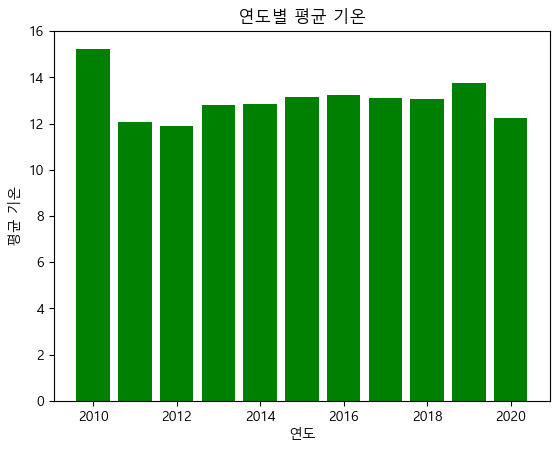

In [21]:
# 3.2 weather['일시']에서 연도 값을 추출하여 저장해서 데이터프레임에 추가하기 - groupby()사용없이
# year 속성을 사용하여 연별로 구분하여 평균 기온 값을 담기

weather['year'] = pd.DatetimeIndex(weather['일시']).year
print(weather['year'])
yearly = [None for x in range(11)] # 연별로 구분된 10개의 None 값
yearly_temp =[0 for x in range(11)] # 연별 평균 기온을 담을 리스트

for i in range(11):
  yearly[i] = weather[weather['year'] == 2010+i]
  yearly_temp[i] = yearly[i]['평균 기온'].mean()

print(yearly_temp)
years = np.arange(2010,2021)
plt.bar(years, yearly_temp, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


In [22]:
weather.head()

,index,일시,평균 기온,최대 풍속,평균 풍속,year
0,0,2010-08-01,28.7,8.3,3.4,2010
1,1,2010-08-02,25.2,8.7,3.8,2010
2,2,2010-08-03,22.1,6.3,2.9,2010
3,3,2010-08-04,25.3,6.6,4.2,2010
4,4,2010-08-05,27.2,9.1,5.6,2010


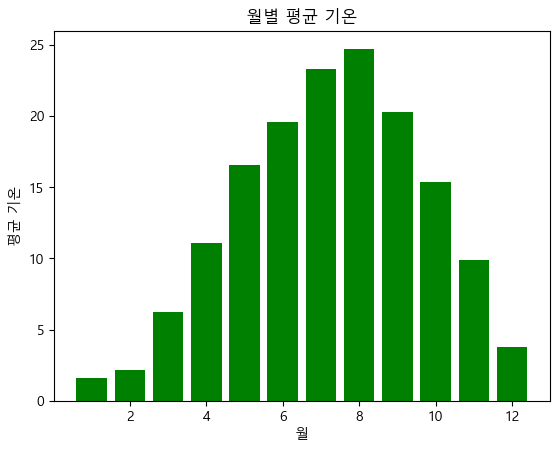

In [23]:
# [데이터분석] 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range(12)] # 별로 구분된 12개의 None 값
monthly_temp =[0 for x in range(12)] # 월별 평균 풍속을 담을 리스트

for i in range(12):
  monthly[i] = weather[weather['month'] == i+1]
  monthly_temp[i] = monthly[i]['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


In [24]:
# 5. 데이터 분석을 할 때는 특정한 값에 기반하여 데이터를 그룹으로 묶는 일이 많다.
weather.head()

,index,일시,평균 기온,최대 풍속,평균 풍속,year,month
0,0,2010-08-01,28.7,8.3,3.4,2010,8
1,1,2010-08-02,25.2,8.7,3.8,2010,8
2,2,2010-08-03,22.1,6.3,2.9,2010,8
3,3,2010-08-04,25.3,6.6,4.2,2010,8
4,4,2010-08-05,27.2,9.1,5.6,2010,8


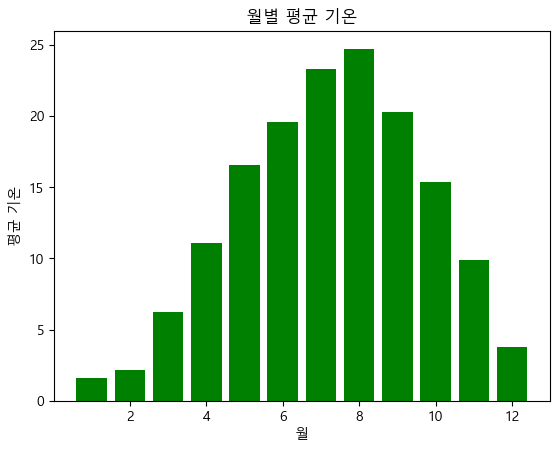

In [26]:
# 기상 정보를 월별로 분석하기
## 데이터가 속한 달을 판단해 새로운 열로 만들고, 이 열을 기준으로 데이터를 묶어 평균값 구하기
# weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means
plt.bar(np.arange(1,13), monthly_means['평균 기온'], color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()

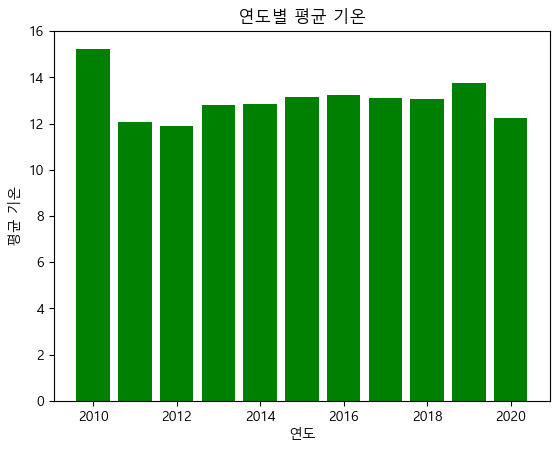

In [27]:
# 6. 기상 정보를 연도별로 분석하기
# weather['year'] = pd.DatetimeIndex(weather['일시']).year
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()
yearly_means
years = np.arange(2010,2021)
plt.bar(years, yearly_temp, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


In [28]:
# [데이터분석] 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기
# 7. 평균 풍속이 4.0이 넘는 달만 추출하기
weather.head()

,index,일시,평균 기온,최대 풍속,평균 풍속,year,month
0,0,2010-08-01,28.7,8.3,3.4,2010,8
1,1,2010-08-02,25.2,8.7,3.8,2010,8
2,2,2010-08-03,22.1,6.3,2.9,2010,8
3,3,2010-08-04,25.3,6.6,4.2,2010,8
4,4,2010-08-05,27.2,9.1,5.6,2010,8


In [29]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

,평균 기온,최대 풍속,평균 풍속
month,,,
3,6.250323,8.871935,4.388827
4,11.064667,9.287121,4.617910
5,16.564194,8.548710,4.219355


Text(0, 0.5, '빈도수')

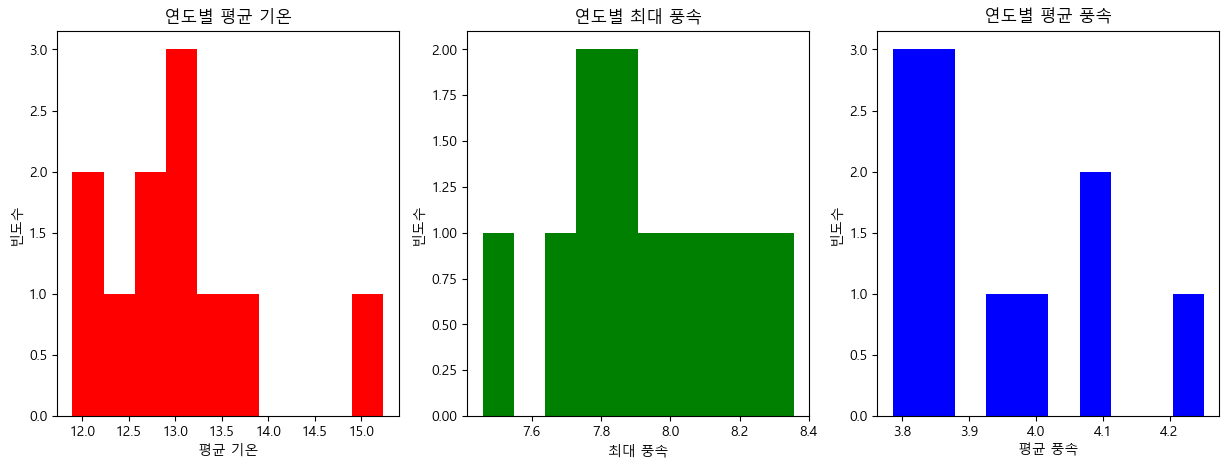

In [30]:
# 8. '평균 기온', '최대 풍속', '평균 풍속'을 하나의 히스트그램으로 출력하시오.
# groupby()와 DatetimeIndex().year을 사용

# Calculate the yearly means
#yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


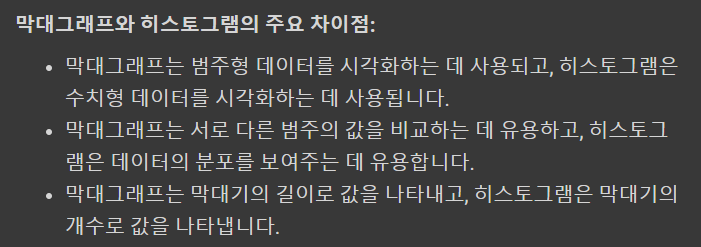

C:\Users\김수지\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


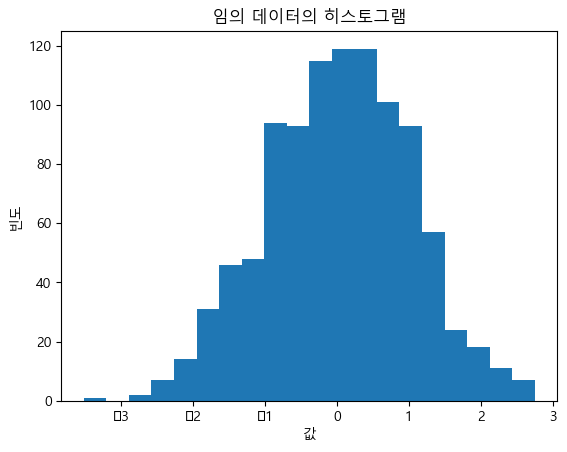

In [31]:
# 히스토그램 사용 예
import matplotlib.pyplot as plt

# 임의의 데이터 생성
data = np.random.randn(1000)

# 히스토그램 그리기
# plt.hist(data)
plt.hist(data, bins=20) #기본 구간 10개 대신 구간 20개로 히스토그램

# 레이블과 제목 추가
plt.xlabel("값")
plt.ylabel("빈도")
plt.title("임의 데이터의 히스토그램")

# 그래프 표시
plt.show()

Text(0, 0.5, 'freq')

C:\Users\김수지\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


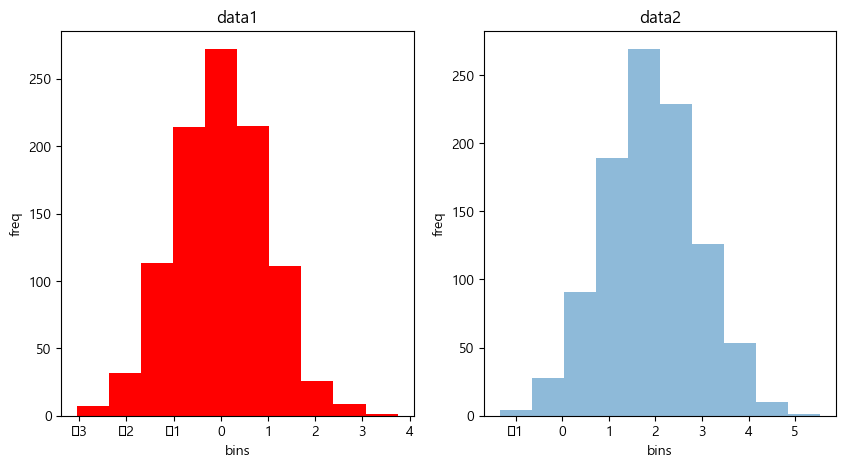

In [32]:
# 한 그림에 여러 개의 히스토그램 그리기:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

data1 = np.random.randn(1000)
data2 = np.random.randn(1000) + 2

axs[0].hist(data1, bins=10, color = "red", label="data2")
axs[0].set_title("data1")
axs[0].set_xlabel("bins")
axs[0].set_ylabel("freq")

axs[1].hist(data2, bins=10, alpha=0.5, label="data 1")
axs[1].set_title("data2")
axs[1].set_xlabel("bins")
axs[1].set_ylabel("freq")

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-14까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [34]:
import pandas as pd

df = pd.read_csv('weather.csv')

print("앞 3개 행:")
print(df.head(3))
print("마지막 3개 행:")
print(df.tail(3))

앞 3개 행:
           일시  평균 기온  최대 풍속  평균 풍속
0  2010-08-01   28.7    8.3    3.4
1  2010-08-02   25.2    8.7    3.8
2  2010-08-03   22.1    6.3    2.9
마지막 3개 행:
              일시  평균 기온  최대 풍속  평균 풍속
3650  2020-07-29   21.6    3.2    1.0
3651  2020-07-30   22.9    9.7    2.4
3652  2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [39]:
df['일시'] = pd.to_datetime(df['일시'])
data_20150606 = df[df['일시'] == '2015-06-06']
print(data_20150606[['일시', '평균 기온', '최대 풍속', '평균 풍속']])

             일시  평균 기온  최대 풍속  평균 풍속
1770 2015-06-06   16.6    4.4    1.9


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [40]:
hottest_day = df[df['평균 기온'] == df['평균 기온'].max()]
print(hottest_day)

             일시  평균 기온  최대 풍속  평균 풍속
1103 2013-08-08   31.3    7.8    4.6


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [41]:
hot_days = df[df['평균 기온'] > 30]
print(hot_days)

             일시  평균 기온  최대 풍속  평균 풍속
1103 2013-08-08   31.3    7.8    4.6
1104 2013-08-09   30.6    9.9    6.4
1105 2013-08-10   30.6    7.4    3.8
2913 2018-07-23   30.5    6.5    1.6
2925 2018-08-04   30.3    5.8    3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

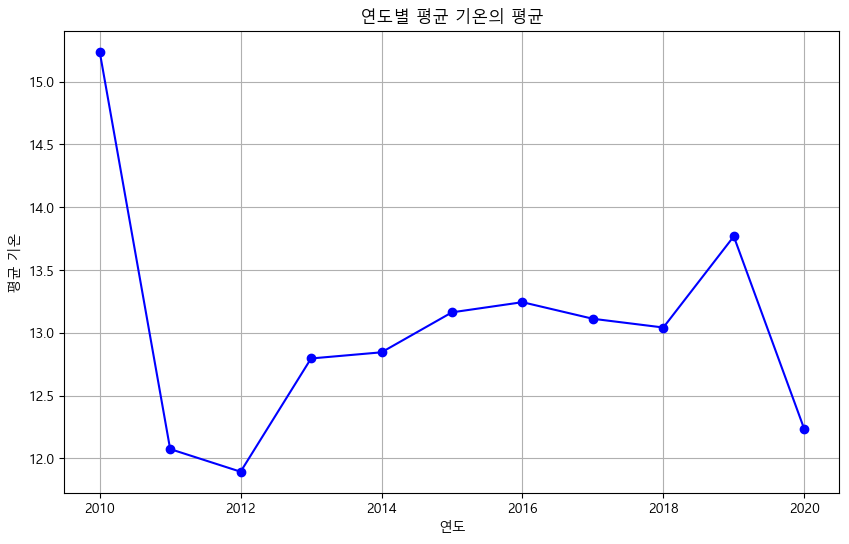

In [42]:
import matplotlib.pyplot as plt

# '일시' 열을 날짜형으로 변환하여 연도 정보 추출
df['일시'] = pd.to_datetime(df['일시'])
df['연도'] = df['일시'].dt.year

# 연도별 평균 기온의 평균 계산
yearly_mean_temp = df.groupby('연도')['평균 기온'].mean()

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
yearly_mean_temp.plot(marker='o', color='b', linestyle='-')
plt.title("연도별 평균 기온의 평균")
plt.xlabel("연도")
plt.ylabel("평균 기온")
plt.grid(True)
plt.show()


## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.